<a href="https://colab.research.google.com/github/SummerLife/EmbeddedSystem/blob/master/MachineLearning/gist/data_augmentation_with_tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [2]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Check out the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) to understand the units used for each augmentation technique we’ve specified.

In [3]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [4]:
image_path = "/content/drive/My Drive/train_data/train/dog/dog.1093.jpg"

In [5]:
image = np.expand_dims(plt.imread(image_path),0)

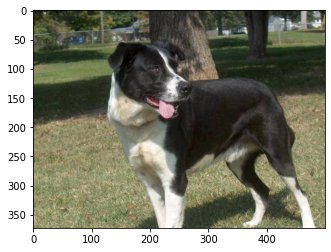

In [6]:
plt.imshow(image[0])

In [7]:
# Next, we’ll generate batches of augmented images from the original image.
aug_iter = gen.flow(image)

In [8]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

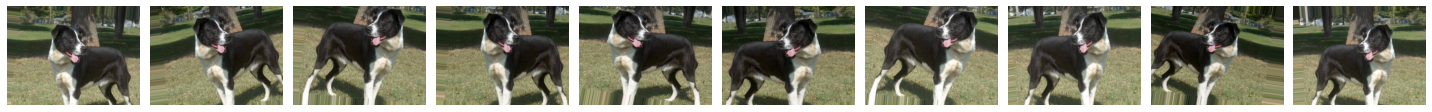

In [9]:
plotImages(aug_images)

In [12]:
# save argument data to disk
aug_iter = gen.flow(image, save_to_dir='train_data/dog', save_prefix='aug-image-', save_format='jpeg')